In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

In [7]:
mapping = np.loadtxt('emnist-bymerge-mapping.txt',dtype=int, usecols=(1), unpack=True)
print(mapping)

[ 48  49  50  51  52  53  54  55  56  57  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  97  98 100 101 102 103 104 110 113 114 116]


In [8]:
char_labels={}
for i in range(47):
    char_labels[i] = chr(mapping[i])
print(char_labels)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


# CNN Model

## Define the Model Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

# define the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=2))
#cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu',))
cnn_model.add(MaxPooling2D(pool_size=2))
#cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(47, activation='softmax'))

# summarize the model
cnn_model.summary()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

## Compile the Model

In [10]:
# compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [11]:
# load the weights that yielded the best validation accuracy
cnn_model.load_weights('EMNIST_CNN.cnn_model.best.hdf5')

## On images from my computer

In [35]:
def predict(path):
    img = cv2.imread(path)
    # convert image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Uncomment if images are ideal
    #gray = np.fliplr(gray)
    #gray = np.rot90(gray)
    # show image
    plt.imshow(gray.squeeze().T, cmap='gray')
    plt.show()
    # Preprocessing
    gray = normalize(gray / 255.0).reshape(-1, 28, 28, 1)
    # predict image label
    pred_matrix = cnn_model.predict(gray)
    pred = np.argmax(pred_matrix)
    #print(pred)
    #print(pred_matrix)
    # Show the results
    print ("This image predicted as letter ",char_labels[pred])
    # Check if predicted label equal to the True label (extacted from image name in it's path)
    if pred == int(re.search(r"[0-9]+", path).group()):
        print("And that is right")
    else:
        print("But sorry that is wrong")

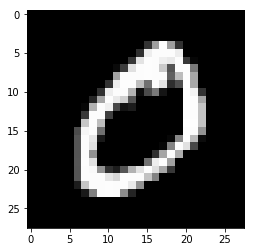

This image predicted as letter  O
But sorry that is wrong


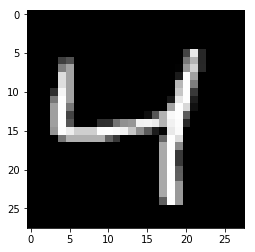

This image predicted as letter  4
And that is right


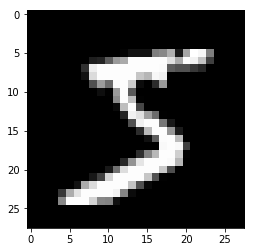

This image predicted as letter  5
And that is right


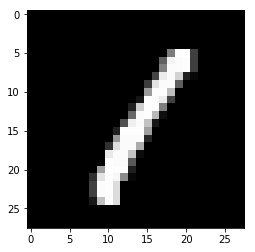

This image predicted as letter  I
But sorry that is wrong


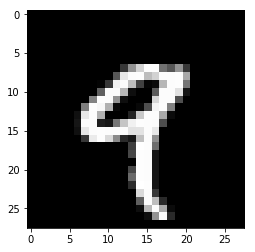

This image predicted as letter  e
But sorry that is wrong


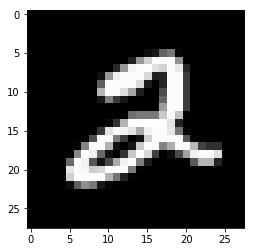

This image predicted as letter  2
And that is right


In [40]:
# load path for my images
from glob import glob
my_imgs = np.array(glob("my_img/*"))
import re
import cv2
for path in my_imgs:
    #path = my_imgs[0]
    predict(path)

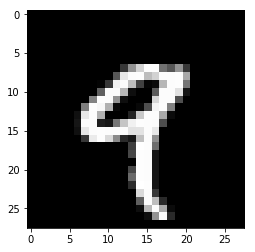

This image predicted as letter  e
But sorry that is wrong


In [39]:
from tkinter import filedialog
file_path = filedialog.askopenfilename()
predict(file_path)

In [31]:
file = open("testfile.txt","w") 
 
file.write("Hello World" + "\n") 
file.write("“This is our new text file” \n") 
file.write("“and this is another line.”") 
file.write("“Why? Because we can.”") 
 
file.close() 